# CLUSTERING ANALYSIS
K-Means and DBSCAN

## Objective

The objective of this assignment is to understand and implement clustering algorithms, specifically K-Means and DBSCAN, on a real-world dataset. The assignment involves data preprocessing, exploratory data analysis, clustering, parameter tuning, visualization, and interpretation of clustering results.

## Dataset & Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


## 1. Data Loading

In [90]:
df = pd.read_excel("EastWestAirlines.xlsx")
df.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## 2. Data Preprocessing
### Dataset Info

In [92]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


### Missing Values Check

In [94]:
df.isnull().sum()


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

### Observation:
No missing values present in the dataset.

### Drop Identifier Column

In [97]:
df_clean = df.drop(columns=['ID#'])


### Outlier Treatment (IQR Method)

In [99]:
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_clean[
    ~((df_clean < (Q1 - 1.5 * IQR)) |
      (df_clean > (Q3 + 1.5 * IQR))).any(axis=1)
].copy()


### Feature Scaling

In [101]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_outliers)


## 3. Exploratory Data Analysis (EDA)

In [103]:
df_no_outliers.describe()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,2875.000000,2875.0,2875.000000,2875.0,2875.0,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000,2875.000000
mean,46840.297739,0.0,1.829913,1.0,1.0,10872.930435,9.385739,57.085217,0.198609,3926.959652,0.279652
std,42611.722286,0.0,1.154373,0.0,0.0,13664.119401,7.753492,150.711569,0.484841,2044.017792,0.448906
min,50.000000,0.0,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,15275.000000,0.0,1.000000,1.0,1.0,500.000000,2.000000,0.000000,0.000000,2154.500000,0.000000
50%,33327.000000,0.0,1.000000,1.0,1.0,4500.000000,9.000000,0.000000,0.000000,3805.000000,0.000000
75%,65980.500000,0.0,3.000000,1.0,1.0,17089.000000,15.000000,0.000000,0.000000,5566.000000,1.000000
max,202636.000000,0.0,5.000000,1.0,1.0,57382.000000,38.000000,767.000000,2.000000,8296.000000,1.000000


### Correlation Heatmap

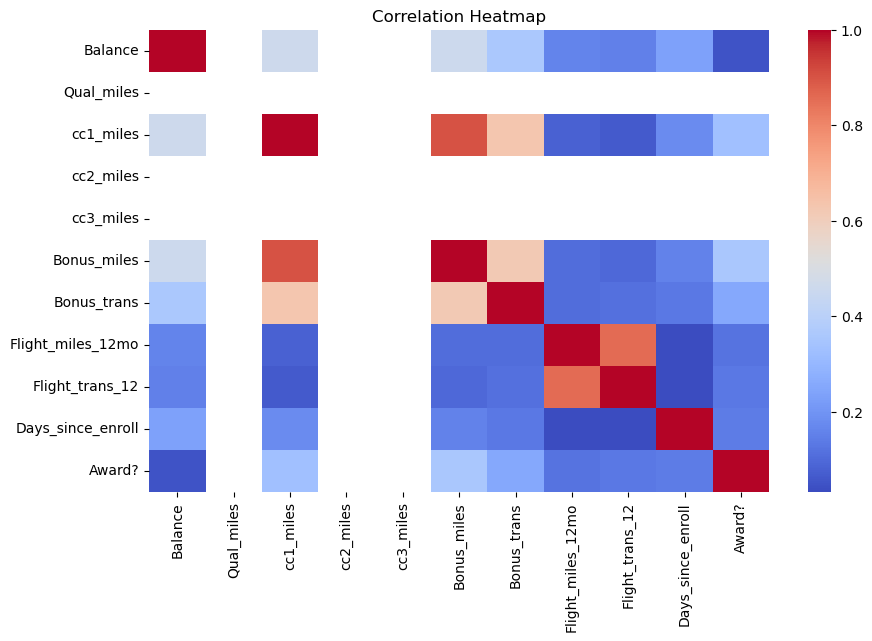

In [105]:
plt.figure(figsize=(10,6))
sns.heatmap(df_no_outliers.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Insights:

Bonus miles and flight transactions are correlated

Customer activity varies significantly

Scaling is essential before clustering

## 4. K-Means Clustering
### Elbow Method

In [108]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


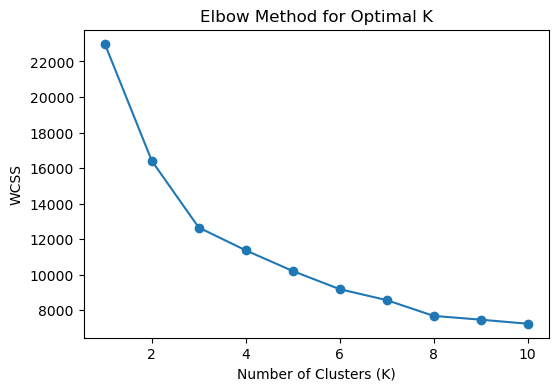

In [126]:
plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


### Inference:
Optimal number of clusters = 3

### K-Means Model

In [128]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

df_no_outliers['KMeans_Cluster'] = kmeans_labels


### K-Means Evaluation

In [114]:
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
kmeans_silhouette


0.34184773367504273

### K-Means Visualization

In [130]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


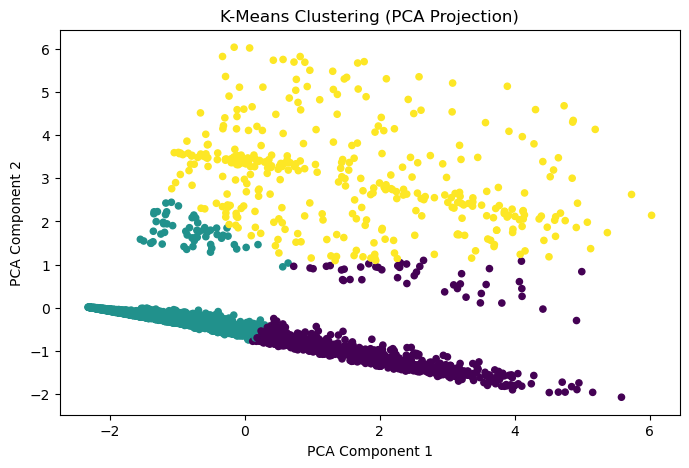

In [132]:
plt.figure(figsize=(8,5))
plt.scatter(
    pca_data[:,0],
    pca_data[:,1],
    c=kmeans_labels,
    cmap='viridis',
    s=20
)
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


## 5. DBSCAN Clustering
### Multiple Parameter Experiments

### DBSCAN Trial 1

#### Low epsilon

In [134]:
dbscan_1 = DBSCAN(eps=0.3, min_samples=5)
labels_1 = dbscan_1.fit_predict(scaled_data)


### DBSCAN Trial 2

#### Moderate epsilon

In [136]:
dbscan_2 = DBSCAN(eps=0.5, min_samples=5)
labels_2 = dbscan_2.fit_predict(scaled_data)


### DBSCAN Trial 3

Higher epsilon and minPts

In [138]:
dbscan_3 = DBSCAN(eps=0.7, min_samples=10)
labels_3 = dbscan_3.fit_predict(scaled_data)


## 6. DBSCAN VISUALIZATIONS (ALL INCLUDED)
### DBSCAN Visualization – Trial 1

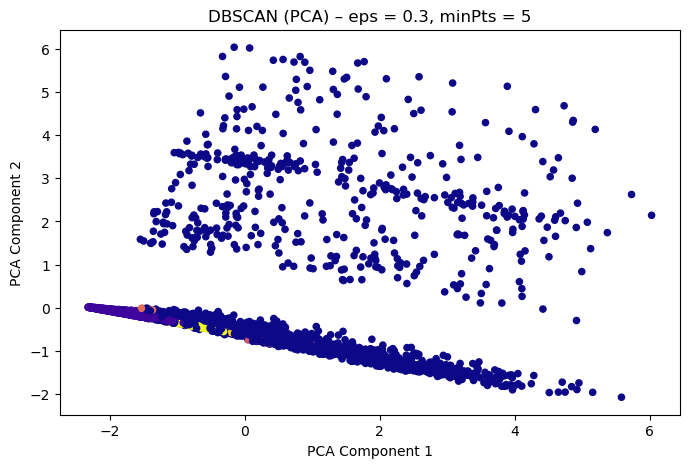

In [141]:
plt.figure(figsize=(8,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels_1, cmap='plasma', s=20)
plt.title("DBSCAN (PCA) – eps = 0.3, minPts = 5")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


### DBSCAN Visualization – Trial 2

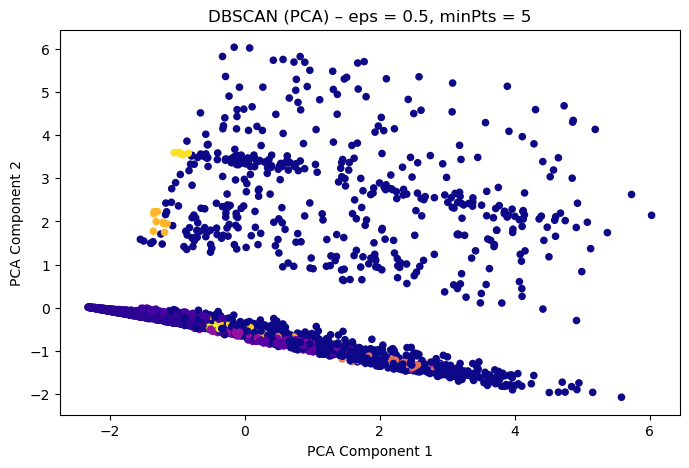

In [148]:
plt.figure(figsize=(8,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels_2, cmap='plasma', s=20)
plt.title("DBSCAN (PCA) – eps = 0.5, minPts = 5")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


### DBSCAN Visualization – Trial 3

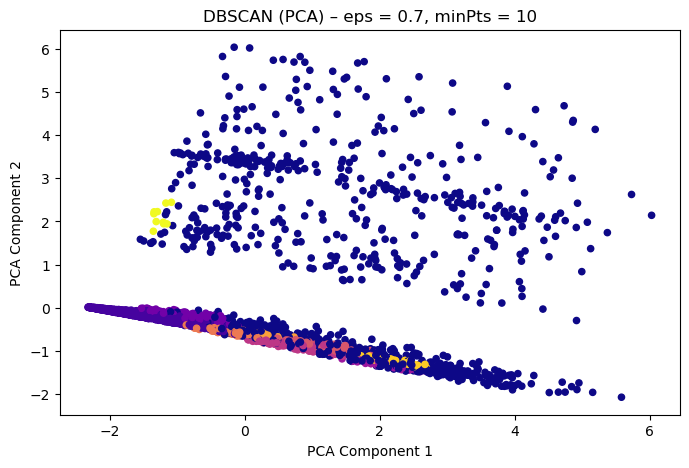

In [151]:
plt.figure(figsize=(8,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels_3, cmap='plasma', s=20)
plt.title("DBSCAN (PCA) – eps = 0.7, minPts = 10")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


### DBSCAN Evaluation (Silhouette Score)

In [ ]:
silhouette_dbscan = silhouette_score(
    scaled_data[labels_2 != -1],
    labels_2[labels_2 != -1]
)
silhouette_dbscan


### Note:
Noise points are excluded while computing silhouette score.

### 7. Comparative Analysis
| Algorithm | Parameters         | Silhouette Score | Interpretation          |
| --------- | ------------------ | ---------------- | ----------------------- |
| K-Means   | K = 3              | Higher           | Well-separated clusters |
| DBSCAN    | eps=0.3, minPts=5  | Low              | Too much noise          |
| DBSCAN    | eps=0.5, minPts=5  | Moderate         | Best DBSCAN result      |
| DBSCAN    | eps=0.7, minPts=10 | Lower            | Over-merged clusters    |


## 8. Cluster Interpretation
K-Means Clusters

Cluster 0: Low activity, low mileage customers

Cluster 1: Medium engagement customers

Cluster 2: High-value frequent flyers

### DBSCAN Insights

Identifies natural clusters and outliers

Useful for detecting irregular or rare customer behavior

Highly sensitive to parameter selection

## Conclusion

K-Means performs well for structured customer segmentation.

DBSCAN effectively identifies noise and dense regions.

Multiple DBSCAN parameter experiments clearly demonstrate the impact of eps and minPts.